<a href="https://colab.research.google.com/github/Daniel322111/Daniel322111/blob/main/MTA_Peak_Ridership_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🚇 Navigating the New York Subway’s Ocean of Data 🚇

Hello, Transit Explorers! Today, we're diving into the labyrinth of New York City’s subway system. With a treasure trove of data at our fingertips courtesy of NYC Open Data ([dataset linked here](https://data.ny.gov/Transportation/MTA-Subway-Hourly-Ridership-Beginning-February-202/wujg-7c2s)), our mission is to uncover the stations that stand at the pinacle of peak hourly ridership.

My educated guess? Transit hubs like "Times Sq-42 St", "Grand Central-42 St", "34 St-Herald Sq", "14 St-Union Sq", and "34 St-Penn Station" are most likely to be included in the top 5 busiest stations. Their central locations and major hub statuses make them strong contenders for the top spots.

At first sight, the dataset was a behemoth, boasting nearly 12 million rows. Each row narrates an hourly chapter of subway ridership unfolding across NYC’s 424 station complexes since November 2022. A quick heads-up: the data is divvyed by "station complexes" here, which in some cases includes multiple stations when they share gates that allow a flow of common traffic.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MTA_Subway_Hourly_Ridership__Beginning_February_2022_20231017.csv')

print(df.tail())


<ipython-input-72-7c072a1dca14>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MTA_Subway_Hourly_Ridership__Beginning_February_2022_20231017.csv')


               transit_timestamp station_complex_id station_complex borough  \
11939896  01/16/2023 03:00:00 PM               R419   Zerega Av (6)      BX   
11939897  09/04/2023 03:00:00 PM               R419   Zerega Av (6)      BX   
11939898  01/14/2023 06:00:00 PM               R419   Zerega Av (6)      BX   
11939899  09/30/2022 08:00:00 AM               R419   Zerega Av (6)      BX   
11939900  12/14/2022 08:00:00 AM               R419   Zerega Av (6)      BX   

         routes payment_method  ridership  transfers   latitude  longitude  \
11939896      6           omny         19          0  40.836487 -73.847038   
11939897      6           omny          8          0  40.836487 -73.847038   
11939898      6      metrocard         20          0  40.836487 -73.847038   
11939899      6      metrocard        140          1  40.836487 -73.847038   
11939900      6      metrocard        165          0  40.836487 -73.847038   

                                          Georeference  

Diving into this project, my goal was straightforward: find the peak ridership hours at New York City subway stations. However, the process was anything but simple. To start I went about importing matplotlab for graphic design, filtering data to include only the last 365 days, and then createing a horizontal bar plot to display the ridership against station names combined with their respective peak hours

The initial challenge was technical. My code, which was supposed to handle and process a massive dataset, struggled—it took more than 30 minutes trying to execute, and then it crashed. The stumbling block was the conversion of numerous transit timestamps to datetime.

The solution came in the form of "Dask," a tool I found when searching online that improved the code’s processing efficiency. Implementing Dask made a significant difference, and the code executed successfully

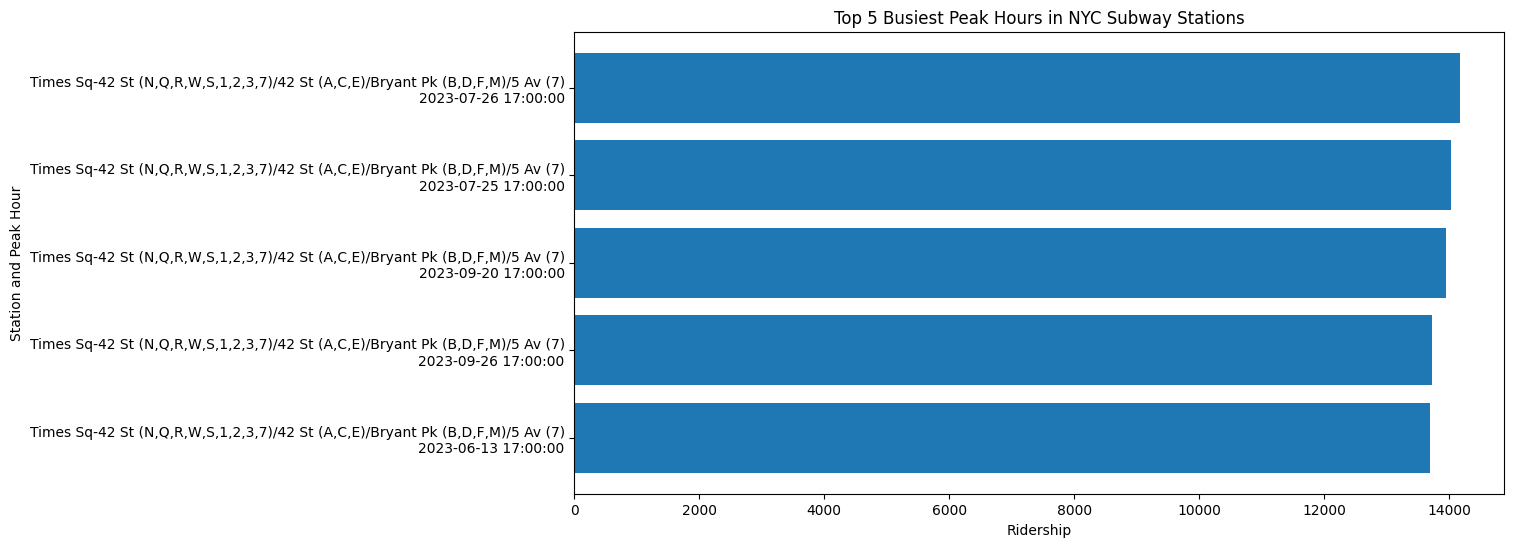

In [ ]:
import matplotlib.pyplot as plt

import dask.dataframe as dd

#Dask
ddf = dd.from_pandas(df, npartitions=10)

ddf['transit_timestamp'] = dd.to_datetime(ddf['transit_timestamp'])

one_year_ago = datetime.now() - timedelta(days=365)
ddf = ddf[ddf['transit_timestamp'] > one_year_ago]


df_filtered = ddf.compute()

#Value sorting
df_top5 = df.nlargest(5, 'ridership')

# New coloumn for labeling ticks
df_top5['station_time'] = df_top5['station_complex'] + '\n' + df_top5['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')


# Graphing
plt.figure(figsize=(12, 6))
plt.barh(df_top5['station_time'], df_top5['ridership'])
plt.xlabel('Ridership')
plt.ylabel('Station and Peak Hour')
plt.title('Top 5 Busiest Peak Hours in NYC Subway Stations')
plt.gca().invert_yaxis()
plt.show()

The initial results were interesting, showing that the top five ridership hours were all concentrated at one station complex: "Times Square-42 St/42 St/ Bryant Park/5 Ave."

It was not entirely surprising that Times Square would lead the pack, in line with my hypothesis.It was however interesting to note that I had now acquired my first data point, that at 5 pm on July 26th, the complex saw nearly 14,000 passengers. However, the data also posed a challenge. The results were somewhat monotonous, as the top entries featured this same station complex.

To add more nuance and depth to the analysis, I considered tweaking the parameters of my inquiry. Instead of focusing solely on the highest ridership hours, I decided it would be more interesting to identify the peak hours across multiple, unique subway stations. But before making this adjustment, curiosity led me to expand the scope from the top 5 to the top 25 ridership hours to see if we might come across any other station names.


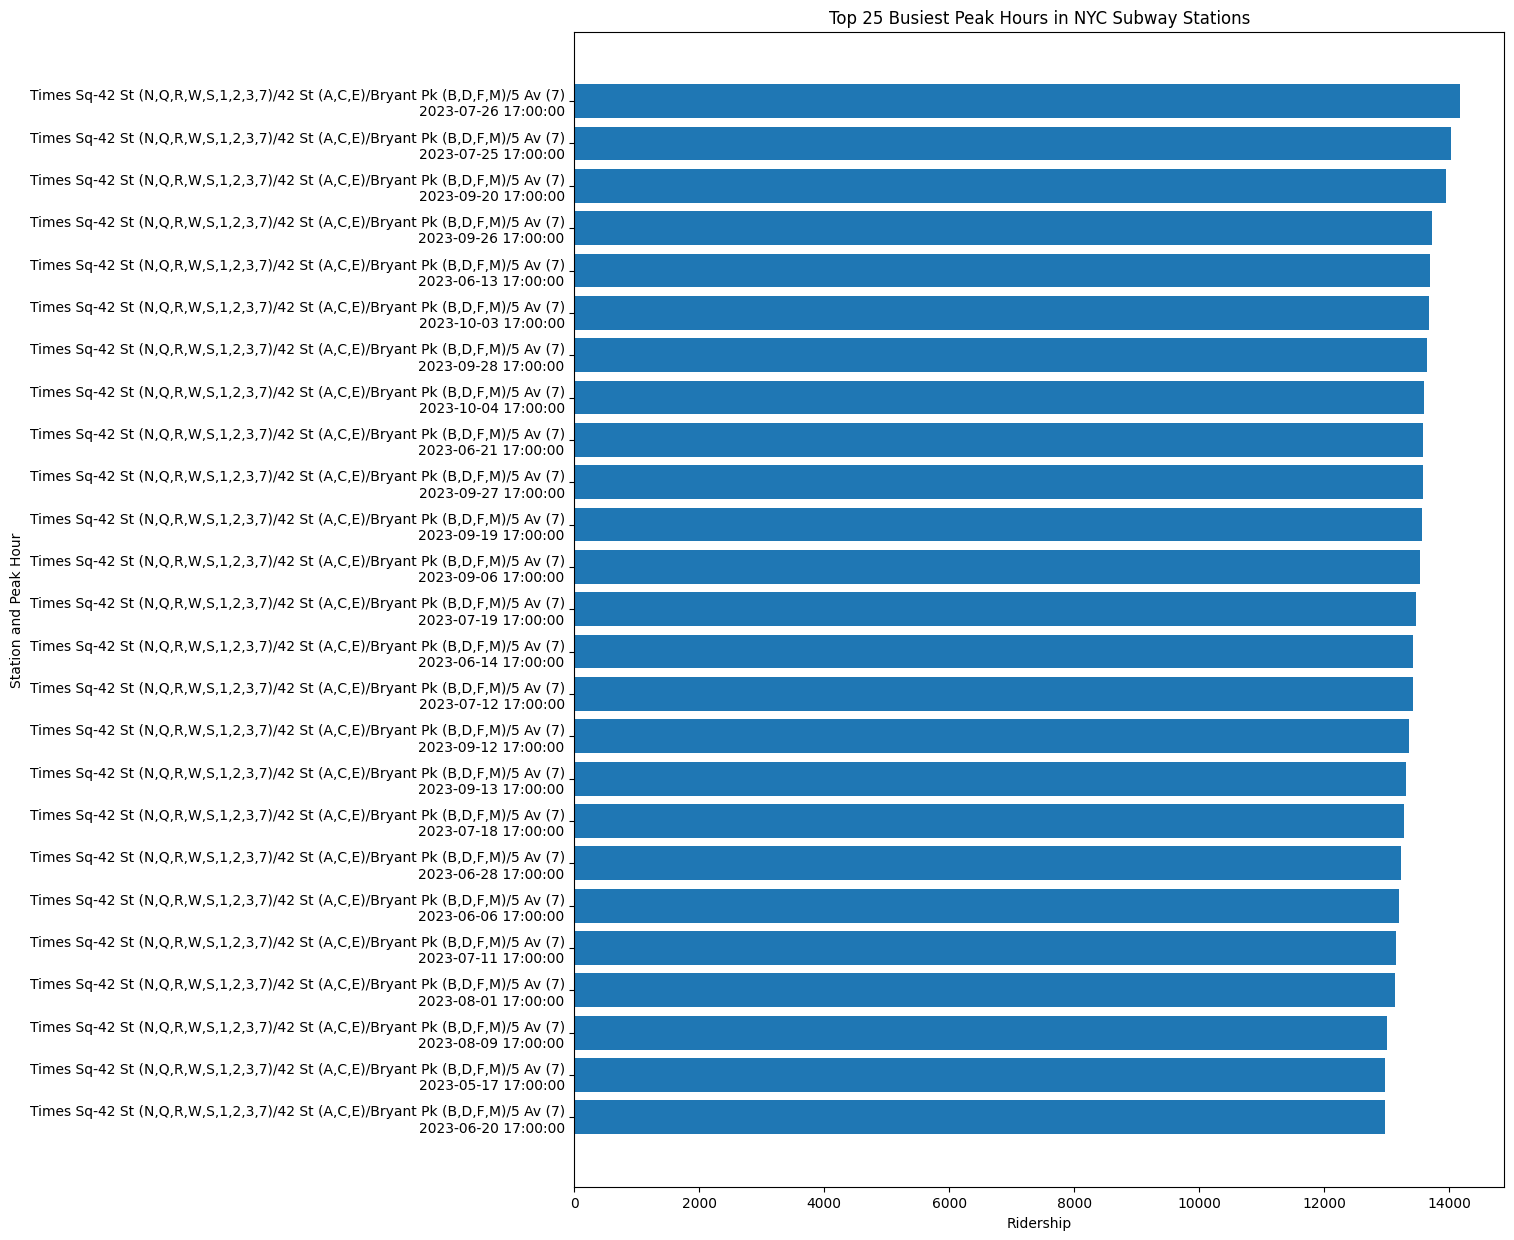

In [ ]:
df_top25 = df.nlargest(25, 'ridership')

df_top25['station_time'] = df_top25['station_complex'] + '\n' + df_top25['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(12, 15))
plt.barh(df_top25['station_time'], df_top25['ridership'])
plt.xlabel('Ridership')
plt.ylabel('Station and Peak Hour')
plt.title('Top 25 Busiest Peak Hours in NYC Subway Stations')
plt.gca().invert_yaxis()
plt.show()

No luck. All 25 of the busiest ridership hours on the MTA in the last year were at the Times Square complex. I was going to need to change the parameters of my code in order to keep only the first appearace of each station name, and thenfilter out duplicate entries. This should leave me with the five busiest peak hours in unique stations.



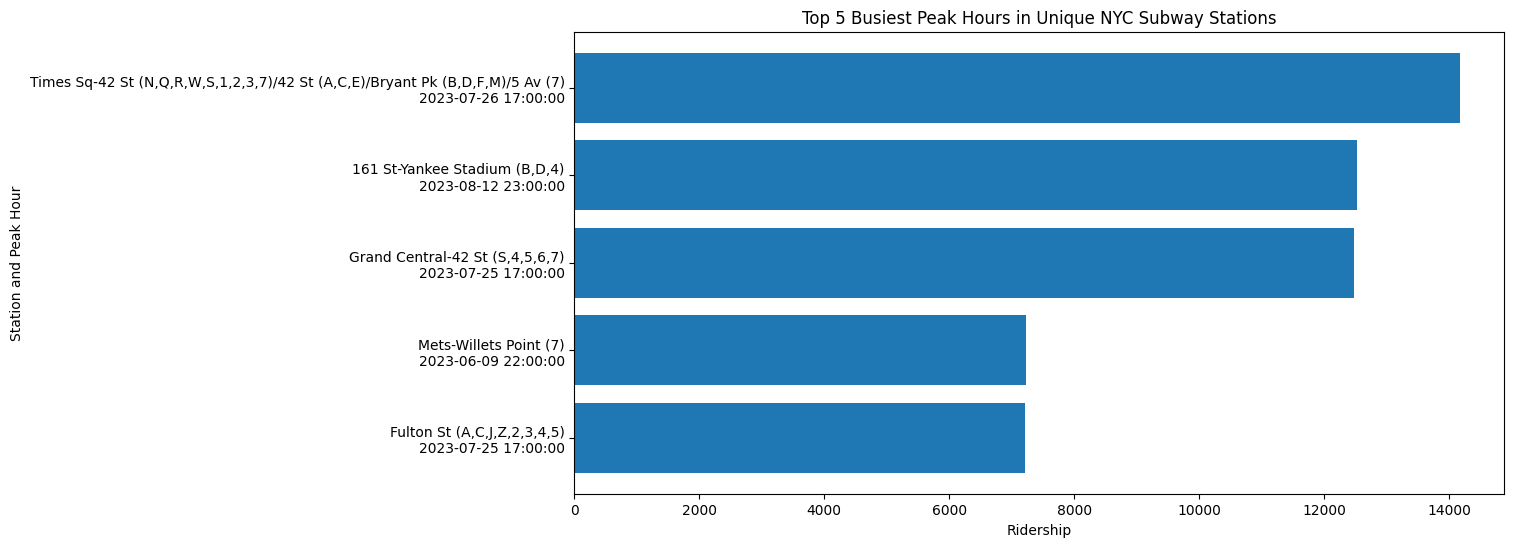

In [ ]:
df_filtered.sort_values('ridership', ascending=False, inplace=True)
df_filtered.drop_duplicates(subset='station_complex', keep='first', inplace=True)

df_top5 = df_filtered.nlargest(5, 'ridership')

df_top5['station_time'] = df_top5['station_complex'] + '\n' + df_top5['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(12, 6))
plt.barh(df_top5['station_time'], df_top5['ridership'])
plt.xlabel('Ridership')
plt.ylabel('Station and Peak Hour')
plt.title('Top 5 Busiest Peak Hours in Unique NYC Subway Stations')
plt.gca().invert_yaxis()
plt.show()


Success! The data revealed that the busiest subway stations during peak hours were: Times Square-42 St; 161 St-Yankee Stadium; Grand Central-42 St; Mets-Willets Point; and Fulton St. These stations had riderships ranging from about 14,000 to 7,000 passengers. However, these findings were quite surprising compared to my initial hypothesis.

---

I hypothesized that the top 5 stations would all be central stations located around midtown and would be transit hubs, specifically "Times Sq-42 St", "Grand Central-42 St", "34 St-Herald Sq", "14 St-Union Sq", and "34 St-Penn Station". This appeared to only be the case with Times Square, and Grand Central. Fulton St as a critical station in New York busy financial district certainly made sense, and followed the same logic for its busy-ness as my initial hypothesis.

However Yankee Stadium and Mets-Willet Point certainly surprised me! In retrospect it may seem obvious that stations built primarily to facilitate mass gatherings in the thousands for baseball games could reach significant hourly milestones as to appear on this list, the thought did not even initially register for me as being in the top 5 when I was creating my hypothesis. The fact that these stations are located on the outskirts of the city, far from Manhattan's midtown, makes their appearance on this list all the more surprising.

---

With the goal of my project realized without too much difficulty, I thought it would be interesting to dive deeper into the data and see what additional findings I could pull. The easiest next step was to expand the results and see what other stations made up NYC top 25 busiest peak hour subway stations.



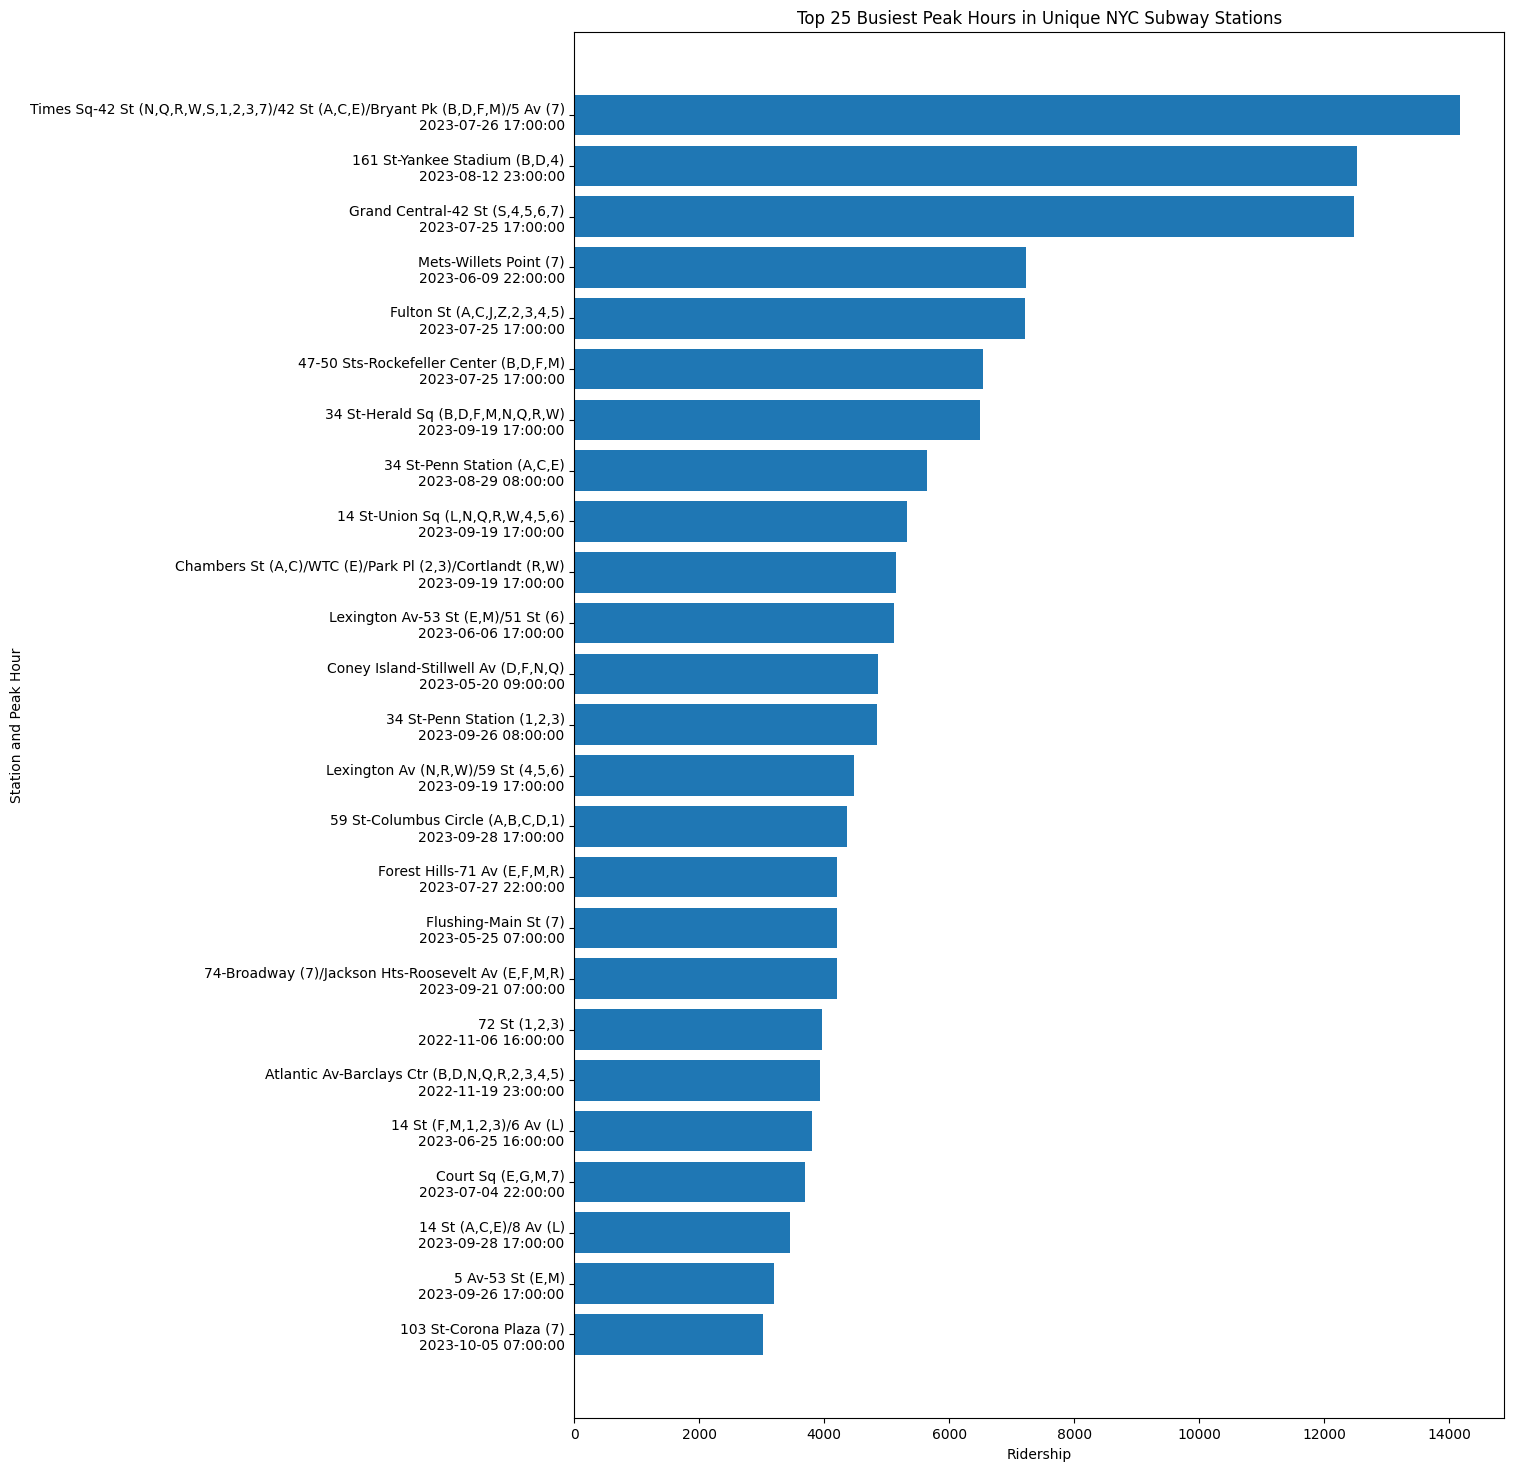

In [ ]:
df_filtered.sort_values('ridership', ascending=False, inplace=True)
df_filtered.drop_duplicates(subset='station_complex', keep='first', inplace=True)

df_top25 = df_filtered.nlargest(25, 'ridership')

df_top25['station_time'] = df_top25['station_complex'] + '\n' + df_top25['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(12, 18))
plt.barh(df_top25['station_time'], df_top25['ridership'])
plt.xlabel('Ridership')
plt.ylabel('Station and Peak Hour')
plt.title('Top 25 Busiest Peak Hours in Unique NYC Subway Stations')
plt.gca().invert_yaxis()
plt.show()

Exploring just beyond the top five busiest stations, we find other hubs such as those initially hypothesized. Notably, stations like Coney Island, Atlantic Ave-Barclays Center, and two terminals on the 7 line in Queens also marked their presence due to their unique roles as gateways to theme parks, arenas, and broader transit links outside the subway lines.

Interestingly, a seasonal trend emerged. No peak hours were recorded from December to April, indicating that colder weather might influence people to choose alternative transportation or limit outdoor activities.

I also realized that considering only "Ridership" to assess foot traffic might not paint the full picture. Including the "Transfer" column, which incorporates bus and other transfer data, can provide a more comprehensive view, even though it won't capture all internal subway transfers accurately.

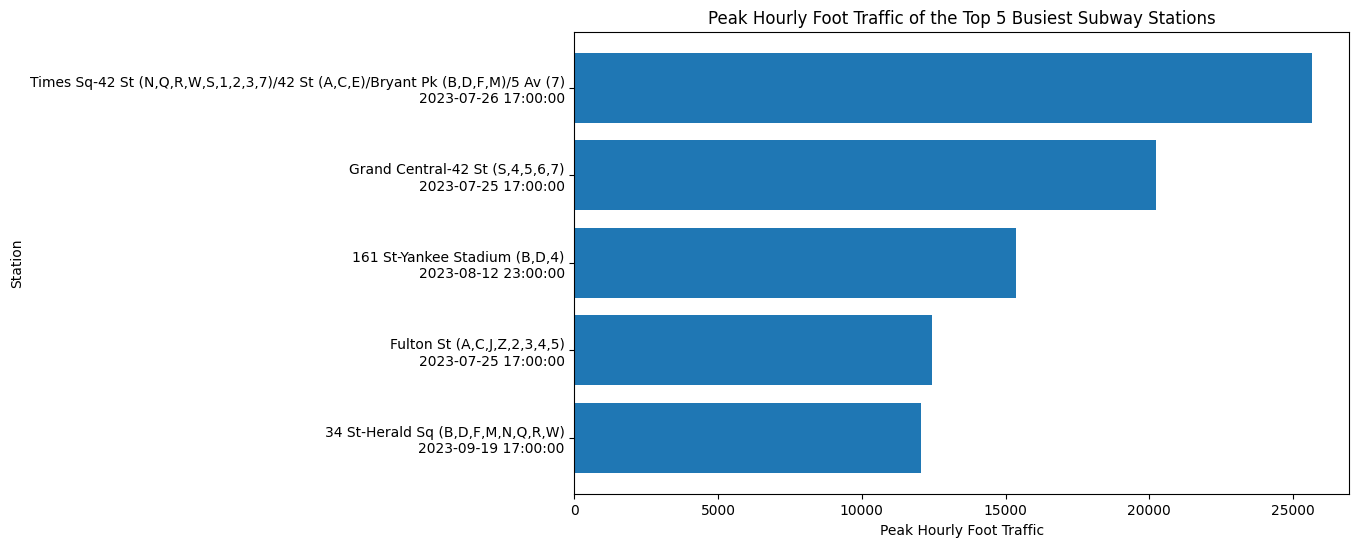

In [ ]:
# Calculate foot_traffic as the sum of ridership and transfers
df['foot_traffic'] = df['ridership'] + df['transfers']

df_grouped = df.groupby(['station_complex', 'transit_timestamp']).foot_traffic.sum().reset_index()

df_peak = df_grouped.loc[df_grouped.groupby('station_complex').foot_traffic.idxmax()]

df_peak = df_peak.sort_values(by='foot_traffic', ascending=False).head(5)

df_peak['station_time'] = df_peak['station_complex'] + '\n' + df_peak['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(10, 6))
plt.barh(df_peak['station_time'], df_peak['foot_traffic'])
plt.xlabel('Peak Hourly Foot Traffic')
plt.ylabel('Station')
plt.title('Peak Hourly Foot Traffic of the Top 5 Busiest Subway Stations')
plt.gca().invert_yaxis()
plt.show()



Including transfer data significantly altered the results. Times Square’s foot traffic surged from 14,000 to over 25,000. This adjustment also caused shifts in the rankings, with Grand Central moving ahead of Yankee Stadium. Mets-Willets Point dropped out of the top five, replaced by 34 St-Herald Square. Consequently, the inclusion of transfer data brought the results more in line with my initial hypothesis, as more of the stations identified were now major transit hubs in midtown.

It would be interesting to expand this out to the top 25.

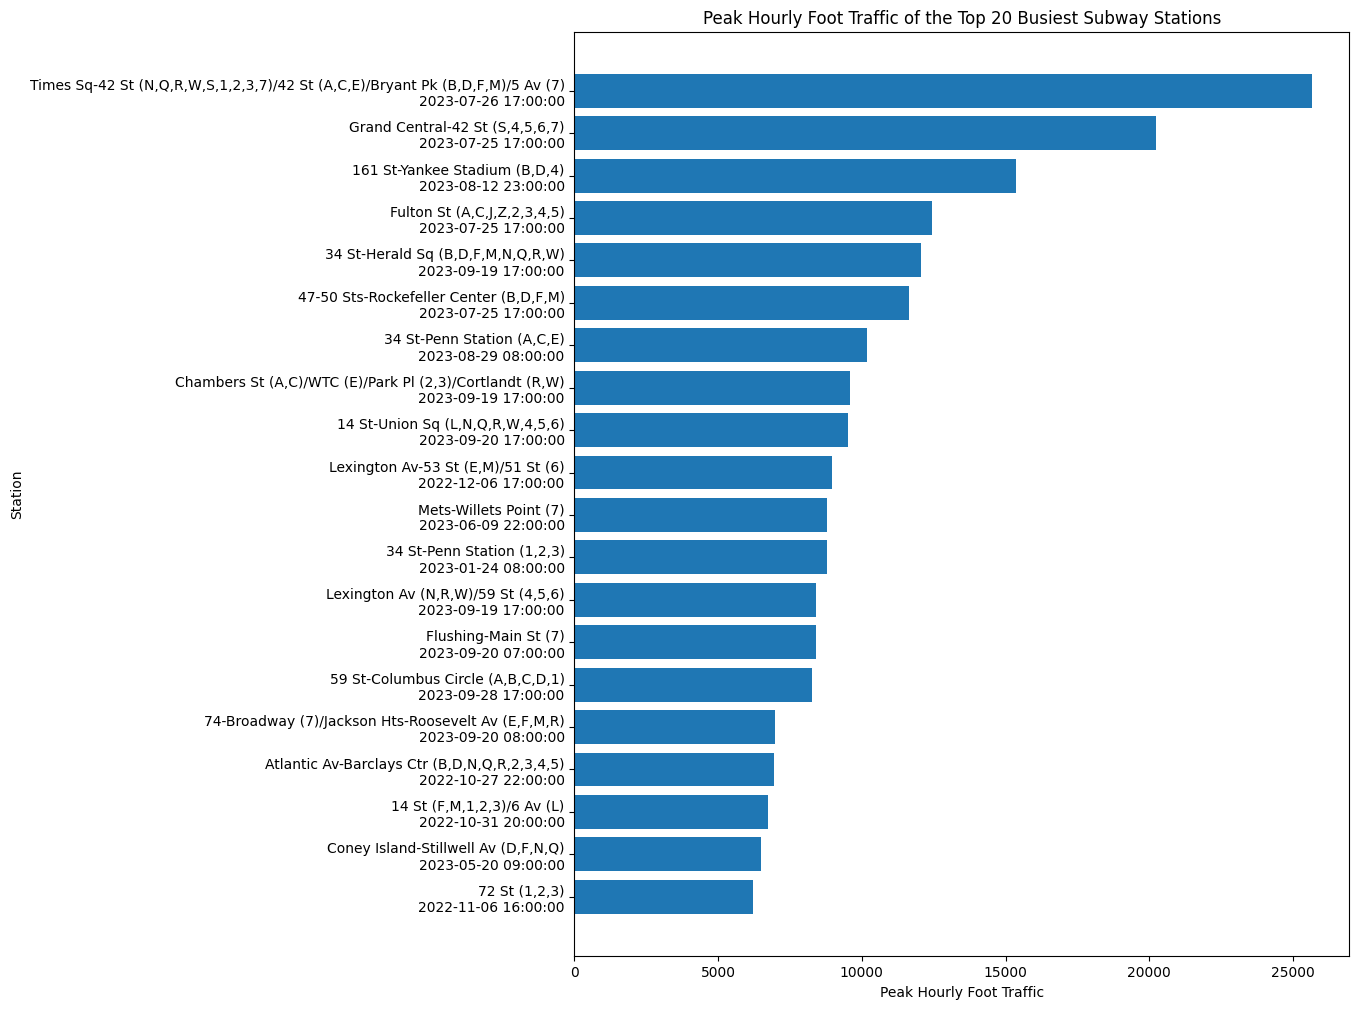

In [ ]:
df_peak = df_grouped.loc[df_grouped.groupby('station_complex').foot_traffic.idxmax()]

df_peak = df_peak.sort_values(by='foot_traffic', ascending=False).head(20)

df_peak['station_time'] = df_peak['station_complex'] + '\n' + df_peak['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(10, 12))
plt.barh(df_peak['station_time'], df_peak['foot_traffic'])
plt.xlabel('Peak Hourly Foot Traffic')
plt.ylabel('Station')
plt.title('Peak Hourly Foot Traffic of the Top 20 Busiest Subway Stations')
plt.gca().invert_yaxis()
plt.show()


The inclusion of 'Transfer' data in our analysis widened the gap between Times Square and the other stations. The foot traffic in stations outside of the top 5 now ranges between 12,000 and 6,000, marking a considerable increase due to the added transfer numbers.

Interestingly, while the stations in the list remain largely consistent, their order has shifted, reflecting the concentration of transfer activities in New York’s major transit hubs.

For a broader perspective, comparing the foot traffic across all 424 station complexes in NYC would offer insights into the vast differences in crowd volumes throughout the MTA system.

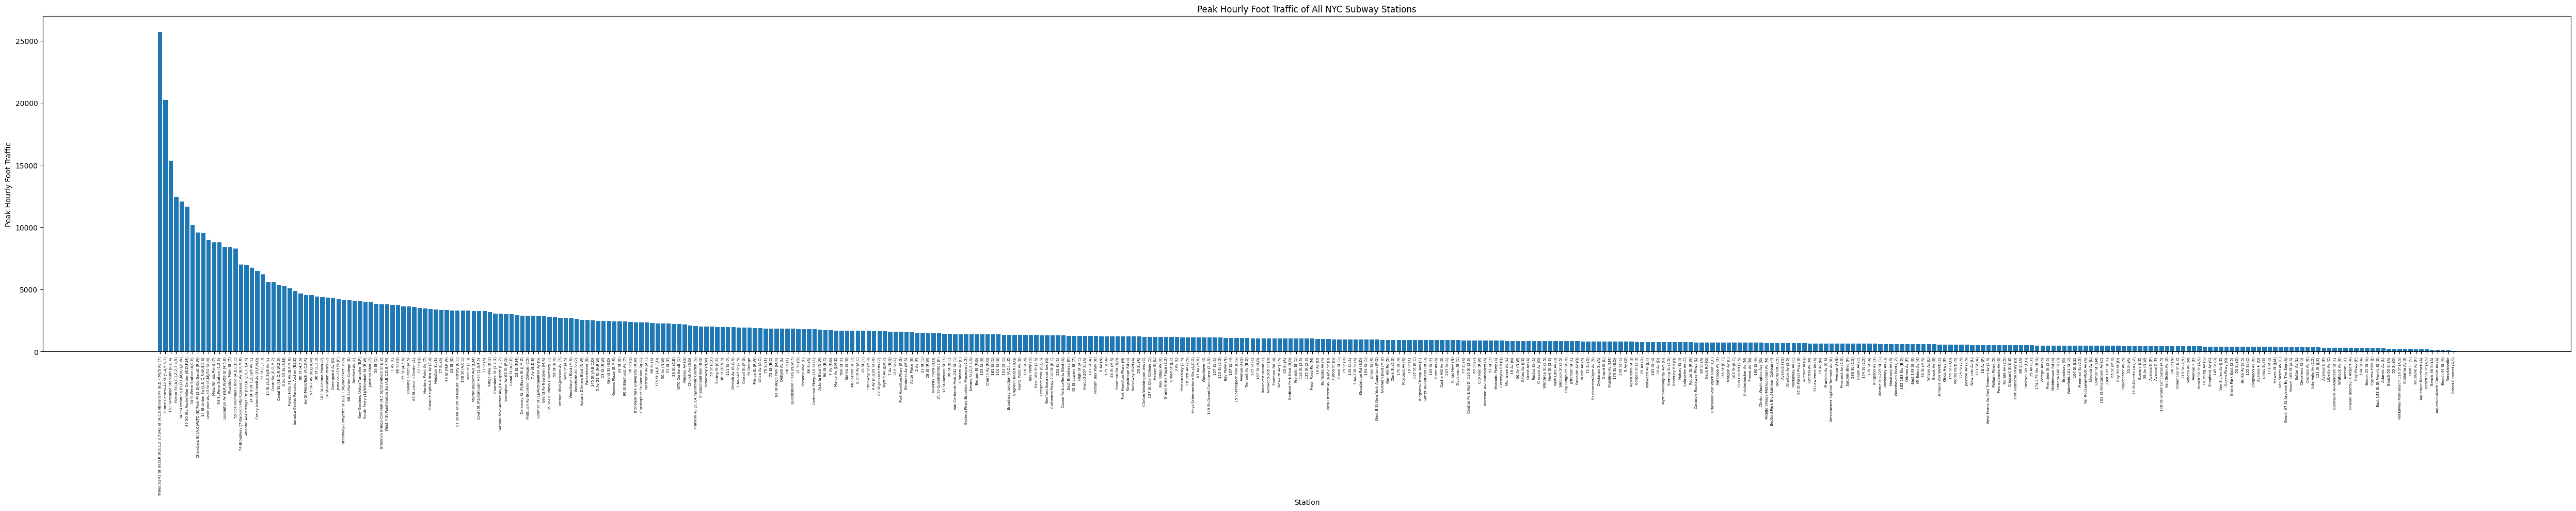

In [ ]:
df_peak = df_grouped.loc[df_grouped.groupby('station_complex').foot_traffic.idxmax()]

df_peak = df_peak.sort_values(by='foot_traffic', ascending=False)

df_peak['station_time'] = df_peak['station_complex'] + '\n' + df_peak['transit_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(50,10))
plt.bar(df_peak['station_complex'], df_peak['foot_traffic'])
plt.ylabel('Peak Hourly Foot Traffic')
plt.xlabel('Station')
plt.title('Peak Hourly Foot Traffic of All NYC Subway Stations')
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

I've tried my best to format the graph above given the graph's size so that it is both legible but we can also gain an understanding of the general trend line of station use. As a result I removed the timestamps from the X-axis ticks.

---


By clicking on and analyzing the graph, a notable exponential decrease in foot traffic is observed among the top 25 busiest stations, transitioning into a more gradual decline thereafter. Personal points of interest for me include Columbia University, who's station lands around the 100 mark in terms of busy-ness and is busy-est on May 17th at 1pm.

The least used station is Broad Channel station, a station serving a small island of 3000 residents in Jamaica Bay, Queens near the terminus of the A line at Rockaway Beach. The station is served only by 10 rush-hour A trains a day.

---
Diving deeper into the data, what would it look like if we looked at peak hourly data by summing up all stations across the entire MTA by each hour?


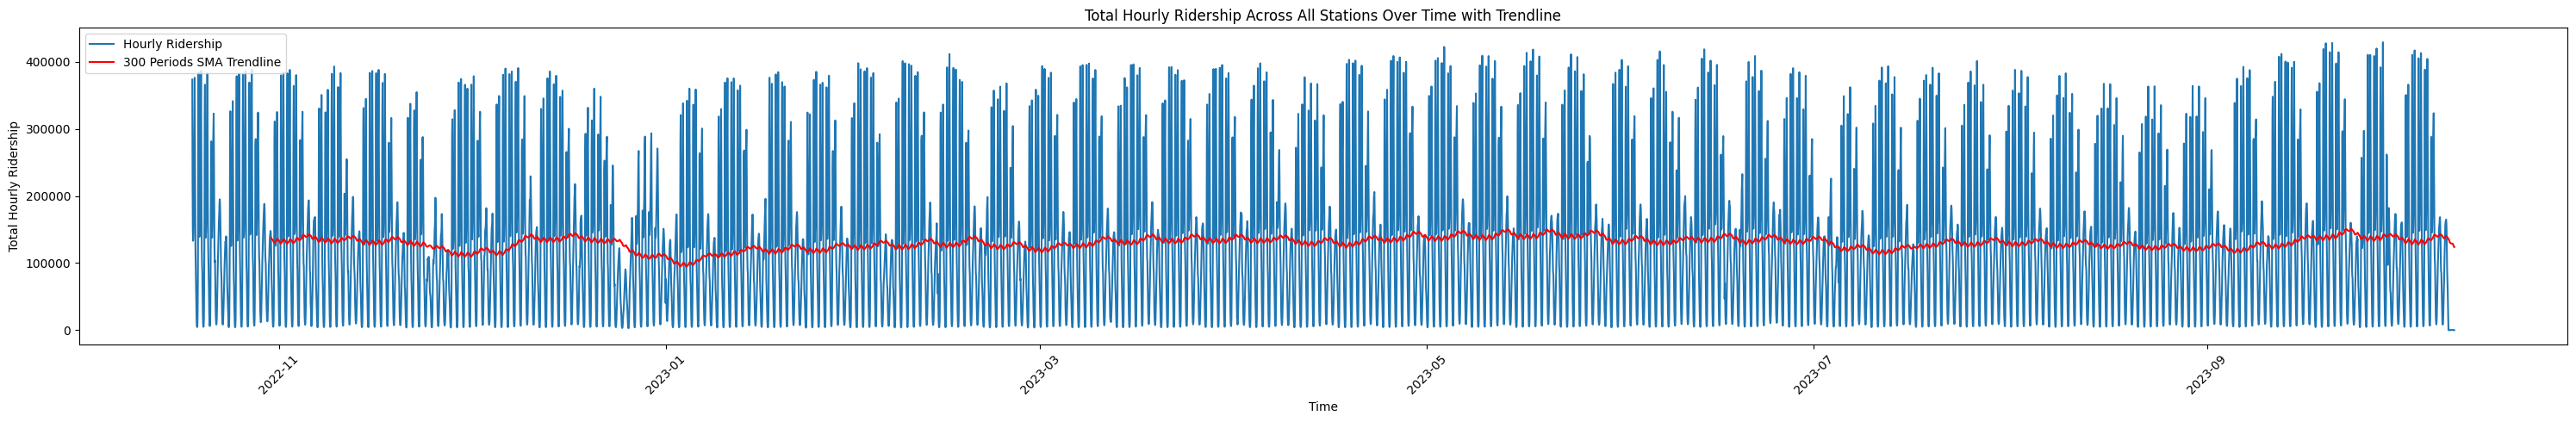

In [ ]:
df_grouped = df.groupby('transit_timestamp').ridership.sum().reset_index()

df_grouped = df_grouped.sort_values(by='transit_timestamp')

# Setting a window to average 300 periods for a trend line
window = 300
df_grouped['SMA_10'] = df_grouped['ridership'].rolling(window=window).mean()


plt.figure(figsize=(30, 5))
plt.plot(df_grouped['transit_timestamp'], df_grouped['ridership'], label='Hourly Ridership')
plt.plot(df_grouped['transit_timestamp'], df_grouped['SMA_10'], color='red', label=f'{window} Periods SMA Trendline')

plt.xlabel('Time')
plt.ylabel('Total Hourly Ridership')
plt.title('Total Hourly Ridership Across All Stations Over Time with Trendline')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The data ranges from peaks of around 400,000 per hour to valleys very close to 0. I've added a trend line that averages the previous 300 periods to provide us a bit of insight into how the MTA changes from month-to-month.

It's clear that the MTA experiences a dip in ridership during the Christmas holiday season, as well as at the start of July. The reason for this can only be speculated, but it does hold with the common anecdotes shared amongst New Yorkers that the city seemingly "empties" out during the Christmas and summer breaks,as people tend to visit family or vacation out of town.

Also interesting to observe are the periodic peaks and valleys. A closer inspection of the graph is required in order to understand what this could represent.

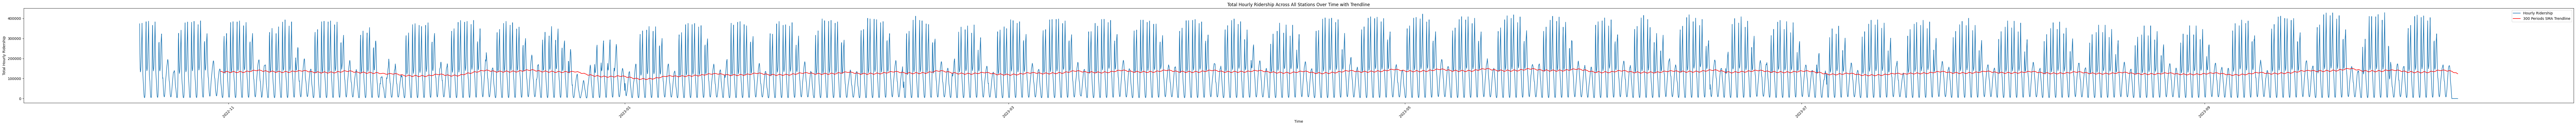

In [ ]:
plt.figure(figsize=(100, 5))
plt.plot(df_grouped['transit_timestamp'], df_grouped['ridership'], label='Hourly Ridership')
plt.plot(df_grouped['transit_timestamp'], df_grouped['SMA_10'], color='red', label=f'{window} Periods SMA Trendline')

plt.xlabel('Time')
plt.ylabel('Total Hourly Ridership')
plt.title('Total Hourly Ridership Across All Stations Over Time with Trendline')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

By increasing the size parameters of the graph, once we click on the graph we can observe that the data follows a typical cadence - five dual-crested peaks and valleys, followed by two single peaks and valleys (the first greater then the latter). Here it is clear that we are observing the weekly ridership schedule - with each of the five dual-crested peak representing each weekday's morning and afternoon rush hours; each valley representing overnight service; and the two single peaks and valleys representing the typical lower weekend service (with Saturday being busier then Sunday).

---

In conclusion, this study shed light on the foot traffic dynamics of NYC's subway system. My initial hypothesis was, to a significant extent, validated. After accounting for transfer data, three major midtown transit hubs - Times Square, Grand Central, and 34 St-Herald Sq - emerged within the top 5 stations with the busiest peak hours. Beyond these findings, our examination offered a broader perspective on network-wide traffic patterns, revealing notable trends and variations. While this exploration provided valuable insights, the data holds the potential for significant further analyses. The subway system is a reflection of the city's pulse, with much more yet to discover.





